# 2D Posterior Corner Plots

This notebook reproduces the 2D posterior reverse corner plots shown in figures 2, 5, and 10 of the paper.

We show the reverse corner plots for both our 'Golden Case' and GW231123, as well as the comparison between the two spin configurations of the total mass series.

In [1]:
# Suppress specific warnings from lal
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

# Import required libraries
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from bilby.core.result import read_in_result
from pesummary.core.plots.publication import twod_contour_plot
from pesummary.utils.samples_dict import MultiAnalysisSamplesDict

# Add path to custom modules to sys.path
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Import custom modules
from config import *

2025-10-16  13:22:43 PESummary WARNING : Unable to install 'pycbc'. You will not be able to use some of the inbuilt functions.


## Function Initialisation

In [2]:
def plot_2d(data, injected_values, param_list, labels=None, save_path=None):

    injected_x = injected_values[param_list[0]]
    injected_y = injected_values[param_list[1]]

    contour_colours = list(color_map.values())

    fig, ax1, ax2, ax3 = data.plot(
        parameters=param_list, type="reverse_triangle", levels=[0.9],
        colors=contour_colours, plot_datapoints=False,
        fontsize={'label': 24, 'legend': 24}, pcolor_kwargs={"alpha": 1.0},
        fill_alpha=0.3, plot_density=False
    )

    ax2.axvline(injected_x, color="black", linestyle="-")
    ax3.axvline(injected_x, color="black", linestyle="-")
    ax1.axhline(injected_y, color="black", linestyle="-")
    ax2.axhline(injected_y, color="black", linestyle="-")

    legend_elements = [Line2D([0], [0], color=color_map[key], lw=2,
                              label=label_map[key]) for key in DICT_KEYS]

    my_kwargs = legend_kwargs.copy()
    my_kwargs["loc"] = "upper left"
    ax2.legend(handles=legend_elements, **my_kwargs)

    if labels is not None:
        ax1.set_ylabel(labels[1])
        ax3.set_xlabel(labels[0])

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, format="png", transparent=True)

    plt.show()

## Golden Case

In [3]:
outdir = "golden_case"
param = "golden_case"

loc = [FILE_PATH.format(outdir=outdir, param=param, freq=freq) for freq in STARTING_FREQUENCIES]

golden_case_recovery = MultiAnalysisSamplesDict.from_files({
    DICT_KEYS[0]: loc[0],
    DICT_KEYS[1]: loc[1],
    DICT_KEYS[2]: loc[2],
}, disable_prior=True)

golden_case_injection_values = read_in_result(loc[0]).injection_parameters

2025-10-16  13:22:49 PESummary WARNING : Unable to install 'pycbc'. You will not be able to use some of the inbuilt functions.
2025-10-16  13:22:49 PESummary WARNING : Result file was written with version bilby=2.2.2.1 while your environment has version bilby=2.6.0. This may cause problems when reading the result file.
2025-10-16  13:22:49 PESummary WARNING : Could not find delta_f in input file and one was not passed from the command line. Using 0.00390625Hz as default
2025-10-16  13:22:51 PESummary INFO    : Averaging the final spin from the following fits: function bbh_final_spin_precessing_projected_UIB2016 at 0x319f67060, function bbh_final_spin_precessing_projected_Healyetal at 0x319f66e80, function bbh_final_spin_precessing_HBR2016 at 0x319f67240
2025-10-16  13:22:51 PESummary INFO    : Averaging the peak luminosity from the following fits: function bbh_peak_luminosity_non_precessing_UIB2016 at 0x319f64040, function bbh_peak_luminosity_non_precessing_Healyetal at 0x319f640e0
202

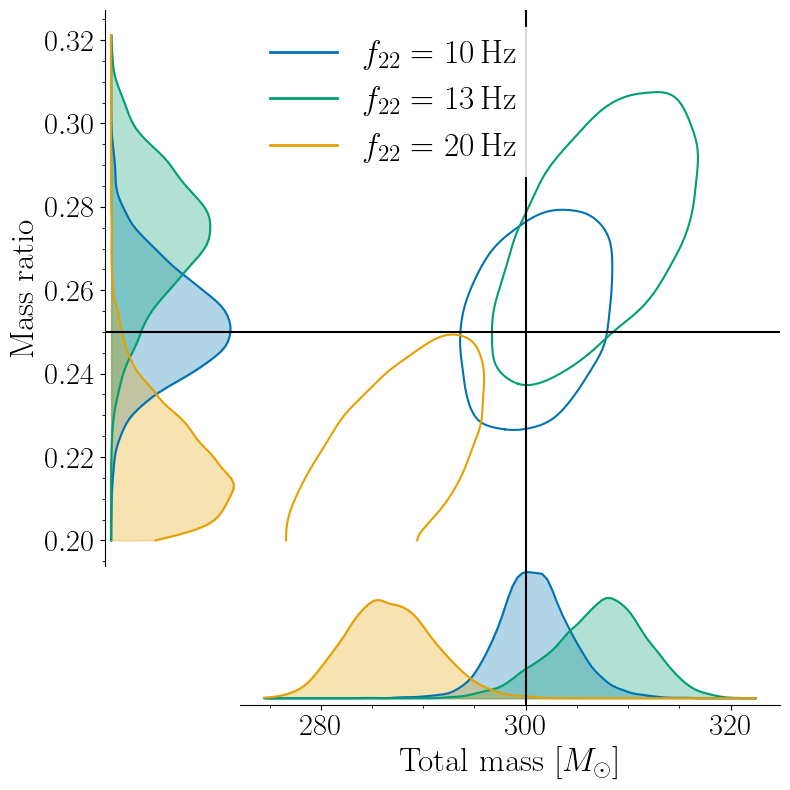

In [4]:
param_list = ['total_mass', 'mass_ratio'] # Parameters to plot
axis_labels = [r"Total mass [$M_{\odot}$]", r"Mass ratio"] # Axis labels for the parameters (x, y)
path_to_save = '../plots/2d_corner_plots/' # Path to save the plot
plot_name = f'golden_case_{param_list[0]}_vs_{param_list[1]}.png' # Name of the plot to save (default png)

plot_2d(
    golden_case_recovery,
    golden_case_injection_values,
    param_list,
    labels=axis_labels,
    save_path=path_to_save + plot_name
)

## Total Mass Spin Comparison

Shows the comparison between the total mass series with spin magnitudes of 0.7 and 0.9 on the top and bottom row respectively.

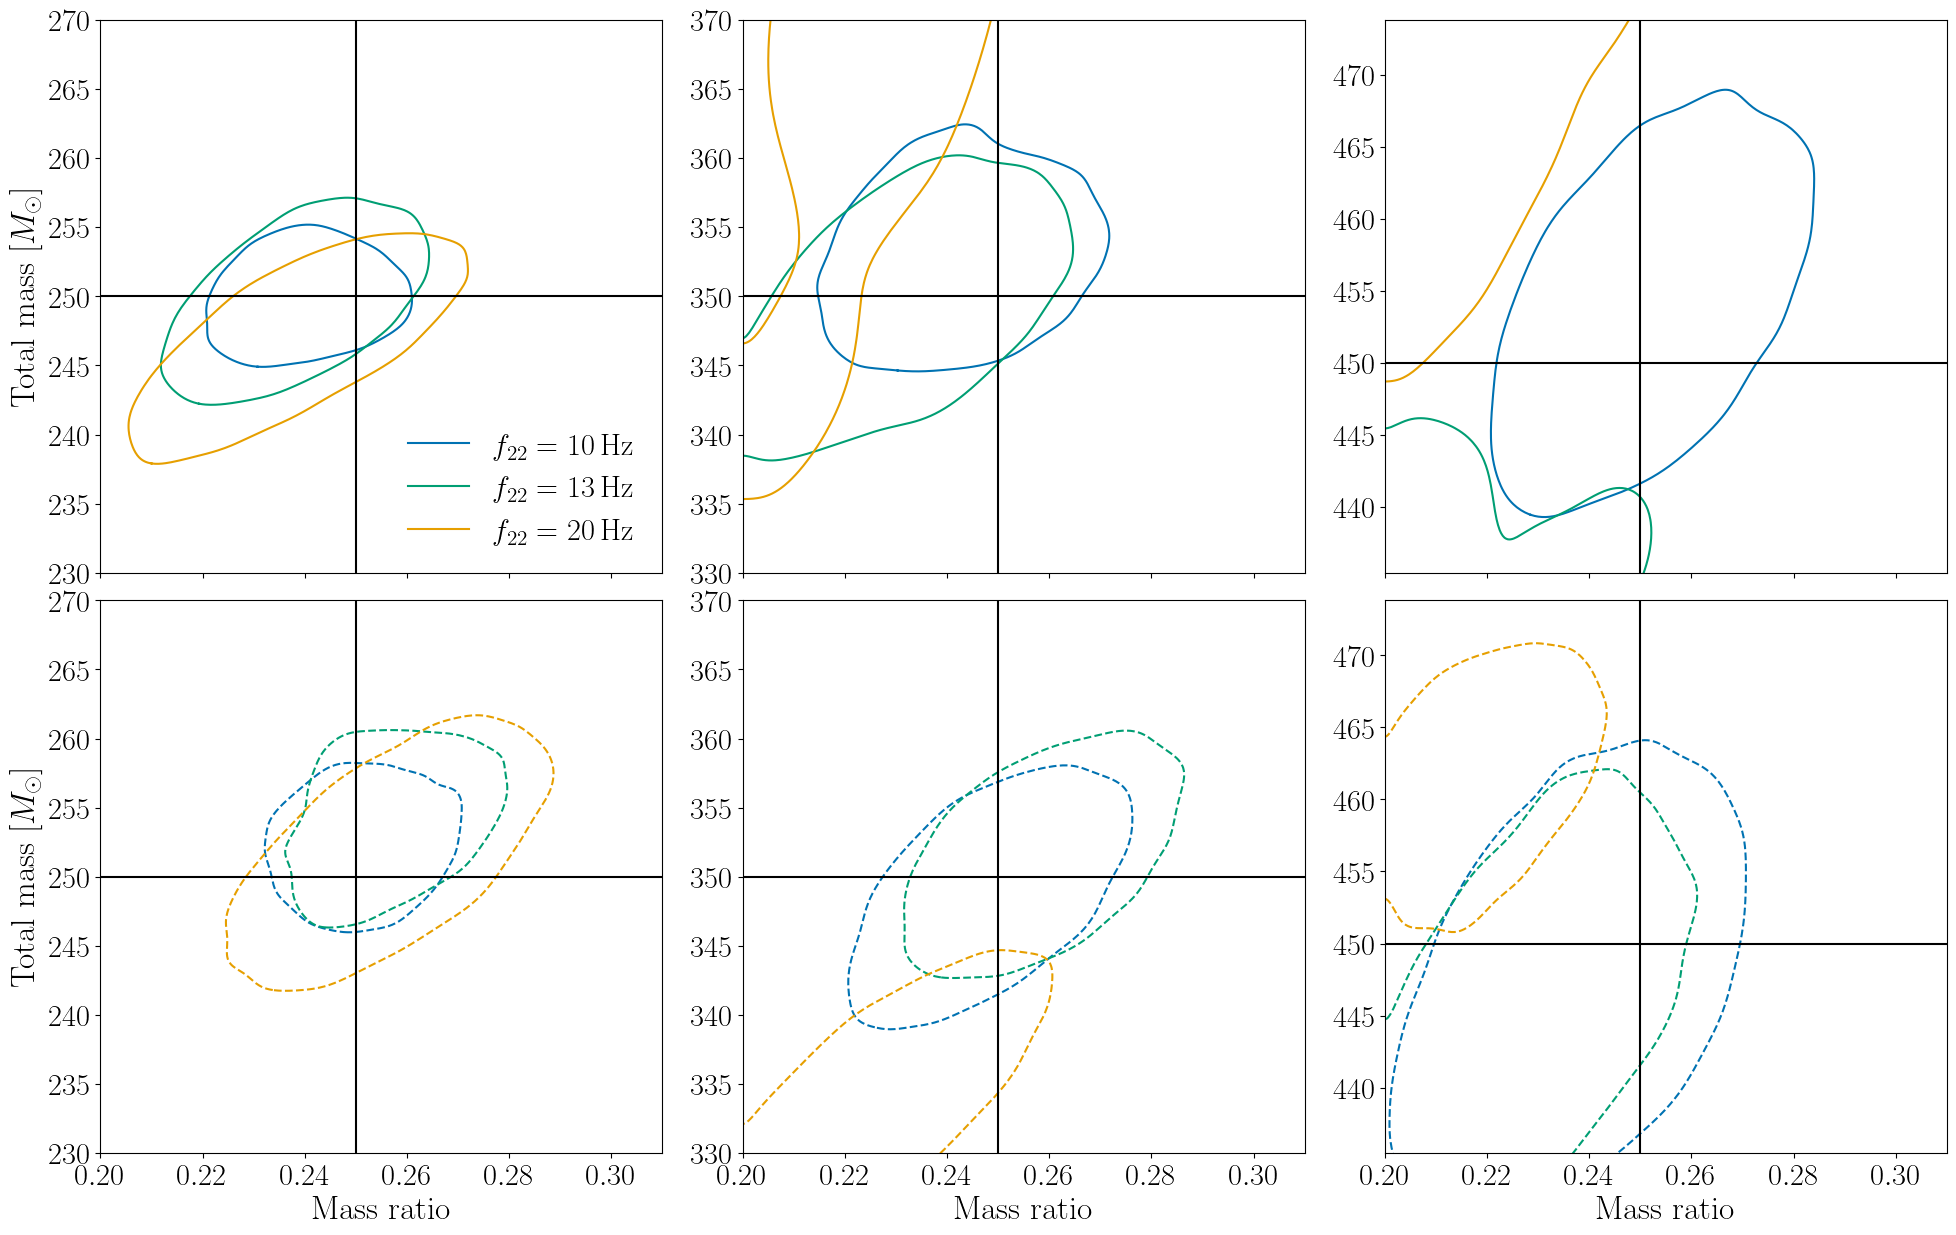

In [6]:
fig, axs = plt.subplots(figsize=(9.7082039325 * 2, 6.0 * 2), ncols=3, nrows=2, sharex=True, sharey="col")
linestyles = ["-", "--", "-."]
masses = [250, 350, 450]
freqs = [10, 13, 20]
plot_name = 'total_mass_spin_comparison.png'

for num, m in enumerate(masses):
    for n, f in enumerate(freqs):
        filename = FILE_PATH.format(outdir='total_mass', param=f"M_{m}", freq=f)
        result = read_in_result(filename)
        pos = result.posterior
        truth = result.injection_parameters
        if m == 350 and f == 20:
            smooth = 15
        else:
            smooth = 7
        twod_contour_plot(pos["mass_ratio"], pos["total_mass"], fig=fig, smooth=smooth, ax=axs[0][num], linestyles="-", color=color_map[DICT_KEYS[n]], plot_datapoints=False, plot_density=False)

for num, m in enumerate(masses):
    for n, f in enumerate(freqs):
        filename = FILE_PATH.format(outdir='total_mass_spin_09', param=f"M_{m}_spin_09", freq=f)
        result = read_in_result(filename)
        pos = result.posterior
        truth = result.injection_parameters
        twod_contour_plot(pos["mass_ratio"], pos["total_mass"], fig=fig, ax=axs[1][num], linestyles="--", color=color_map[DICT_KEYS[n]], plot_datapoints=False, plot_density=False)

for num, ax in enumerate(axs[0][:1]):
    handles = [Line2D([], [], color=color_map[DICT_KEYS[k]], label=label_map[DICT_KEYS[k]]) for k in range(len(DICT_KEYS))]
    ax.legend(handles=handles, loc="lower right", prop={"size": 22}, frameon=False, handler_map=None)
    ax.set_xlim([0.2, 0.31])
    ax.set_ylim([masses[num] - 20, masses[num] + 20])

axs[0][1].set_ylim([330, 370])

for num, _ in enumerate(axs):
    for idx, _ in enumerate(axs[num]):
        axs[num][idx].axhline(masses[idx], color='k')
        axs[num][idx].axvline(truth["mass_ratio"], color='k')
        axs[num][idx].grid(visible=False)

plt.subplots_adjust(hspace=0.05)
y_label = r"Total mass [$M_{\odot}$]"
x_label = r"Mass ratio"
axs[0][0].set_ylabel(y_label)
axs[1][0].set_ylabel(y_label)
axs[1][0].set_xlabel(x_label)
axs[1][1].set_xlabel(x_label)
axs[1][2].set_xlabel(x_label)
plt.savefig(path_to_save + plot_name, bbox_inches="tight")